In [1]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [2]:
#dataset uploaded
from google.colab import files
files.upload()

Saving IMDb Movie Database.xlsx to IMDb Movie Database.xlsx


{'IMDb Movie Database.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x97\xce\xdf\xff}\x01\x00\x00\x88\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [3]:
df=pd.read_excel('IMDb Movie Database.xlsx')
df

Title Release Date        Color/B&W      Genre  \
0     Over the Hill to the Poorhouse   1920-09-15  Black and White      Crime   
1                         Metropolis   1927-01-26  Black and White      Drama   
2                The Broadway Melody   1929-11-11  Black and White    Musical   
3                        42nd Street   1933-08-29  Black and White     Comedy   
4                            Top Hat   1935-04-15  Black and White     Comedy   
...                              ...          ...              ...        ...   
3720             Unfinished Business   2015-02-25            Color     Comedy   
3721                        Vacation   2015-08-03            Color  Adventure   
3722             Victor Frankenstein   2015-03-08            Color      Drama   
3723             We Are Your Friends   2015-05-14            Color      Drama   
3724                   Woman in Gold   2015-02-17            Color  Biography   

     Language  Country     Rating        Lead Actor       Director Name  \
0     English      USA  Not Rated      Stephen Carr   Harry F. Millarde   
1      German  Germany  Not Rated     Brigitte Helm          Fritz Lang   
2     English      USA     Passed        Anita Page      Harry Beaumont   
3     English      USA    Unrated     Ginger Rogers         Lloyd Bacon   
4     English      USA   Approved     Ginger Rogers       Mark Sandrich   
...       ...      ...        ...               ...                 ...   
3720  English      USA          R     Tom Wilkinson           Ken Scott   
3721  English      USA          R   Chris Hemsworth  John Francis Daley   
3722  English      USA      PG-13  Daniel Radcliffe       Paul McGuigan   
3723  English       UK          R   Vanessa Lengies          Max Joseph   
3724  English       UK      PG-13     Ryan Reynolds        Simon Curtis   

      Lead Actor FB Likes  Cast FB Likes  Director FB Likes  Movie FB Likes  \
0                     2.0              4                  0               0   
1                   136.0            203                756           12000   
2                    77.0            109                  4             167   
3                   610.0            995                 24             439   
4                   610.0            824                 10            1000   
...                   ...            ...                ...             ...   
3720               1000.0           1564                 31               0   
3721              26000.0          40312                  0           28000   
3722              11000.0          12876                118           11000   
3723                804.0           3013                 31               0   
3724              16000.0          17866                 64           34000   

      IMDb Score (1-10)  Total Reviews  Duration (min)  Gross Revenue  \
0                   4.8            1.0           110.0        3000000   
1                   8.3          260.0           145.0          26435   
2                   6.3           36.0           100.0        2808000   
3                   7.7           65.0            89.0        2300000   
4                   7.8           66.0            81.0        3000000   
...                 ...            ...             ...            ...   
3720                5.4           90.0            91.0       10214013   
3721                6.1          204.0            99.0       58879132   
3722                6.0          159.0           110.0        5773519   
3723                6.1          158.0            96.0        3590010   
3724                7.3          203.0           109.0       33305037   

        Budget  
0       100000  
1      6000000  
2       379000  
3       439000  
4       609000  
...        ...  
3720  35000000  
3721  31000000  
3722  40000000  
3723   2000000  
3724  11000000  

[3725 rows x 18 columns]

In [4]:
df.head(5)

Title Release Date        Color/B&W    Genre  \
0  Over the Hill to the Poorhouse   1920-09-15  Black and White    Crime   
1                      Metropolis   1927-01-26  Black and White    Drama   
2             The Broadway Melody   1929-11-11  Black and White  Musical   
3                     42nd Street   1933-08-29  Black and White   Comedy   
4                         Top Hat   1935-04-15  Black and White   Comedy   

  Language  Country     Rating     Lead Actor      Director Name  \
0  English      USA  Not Rated   Stephen Carr  Harry F. Millarde   
1   German  Germany  Not Rated  Brigitte Helm         Fritz Lang   
2  English      USA     Passed     Anita Page     Harry Beaumont   
3  English      USA    Unrated  Ginger Rogers        Lloyd Bacon   
4  English      USA   Approved  Ginger Rogers      Mark Sandrich   

   Lead Actor FB Likes  Cast FB Likes  Director FB Likes  Movie FB Likes  \
0                  2.0              4                  0               0   
1                136.0            203                756           12000   
2                 77.0            109                  4             167   
3                610.0            995                 24             439   
4                610.0            824                 10            1000   

   IMDb Score (1-10)  Total Reviews  Duration (min)  Gross Revenue   Budget  
0                4.8            1.0           110.0        3000000   100000  
1                8.3          260.0           145.0          26435  6000000  
2                6.3           36.0           100.0        2808000   379000  
3                7.7           65.0            89.0        2300000   439000  
4                7.8           66.0            81.0        3000000   609000

In [5]:
df.shape

(3725, 18)

In [6]:
df.isnull().sum()

Title                   0
Release Date            0
Color/B&W               0
Genre                   0
Language                2
Country                 0
Rating                 49
Lead Actor              3
Director Name           0
Lead Actor FB Likes     3
Cast FB Likes           0
Director FB Likes       0
Movie FB Likes          0
IMDb Score (1-10)       0
Total Reviews           1
Duration (min)          1
Gross Revenue           0
Budget                  0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



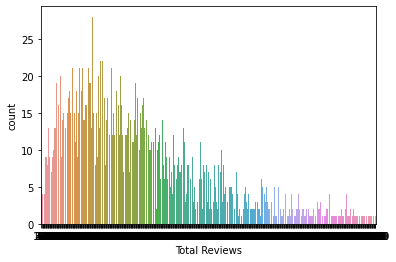

In [17]:
#data analysis
#count yes no graph
y= df["Total Reviews"]

sns.countplot(y)
 

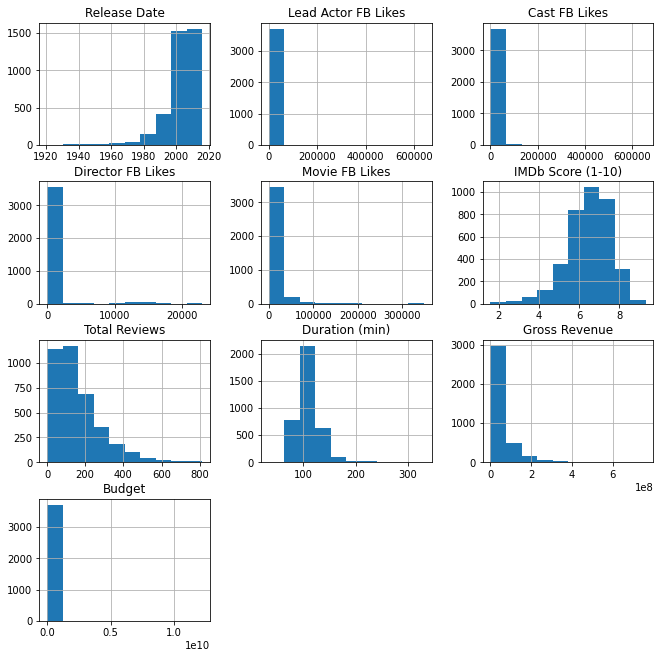

In [19]:
#data visualize
df.hist(figsize=(11,11))
plt.show()

In [21]:
df2=df[['Lead Actor FB Likes','Cast FB Likes','Director FB Likes','Movie FB Likes']]
df2  #final independen value

Lead Actor FB Likes  Cast FB Likes  Director FB Likes  Movie FB Likes
0                     2.0              4                  0               0
1                   136.0            203                756           12000
2                    77.0            109                  4             167
3                   610.0            995                 24             439
4                   610.0            824                 10            1000
...                   ...            ...                ...             ...
3720               1000.0           1564                 31               0
3721              26000.0          40312                  0           28000
3722              11000.0          12876                118           11000
3723                804.0           3013                 31               0
3724              16000.0          17866                 64           34000

[3725 rows x 4 columns]

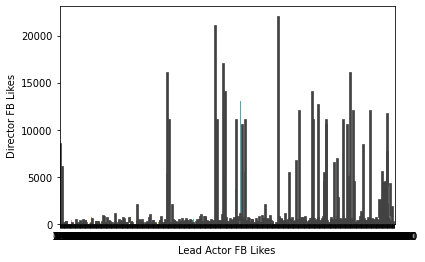

In [23]:
sns.barplot(x="Lead Actor FB Likes", y="Director FB Likes", data=df2)
plt.show()

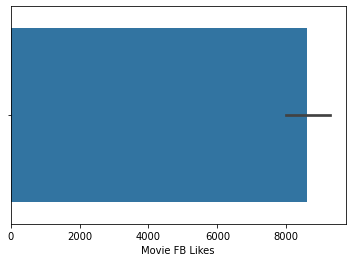

In [24]:
sns.barplot(x=df2['Movie FB Likes'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



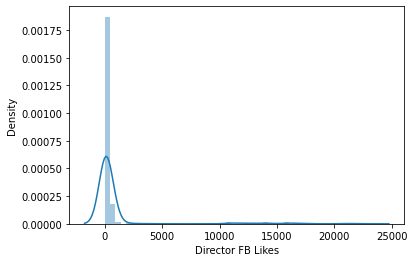

In [25]:
sns.distplot(df2["Director FB Likes"])

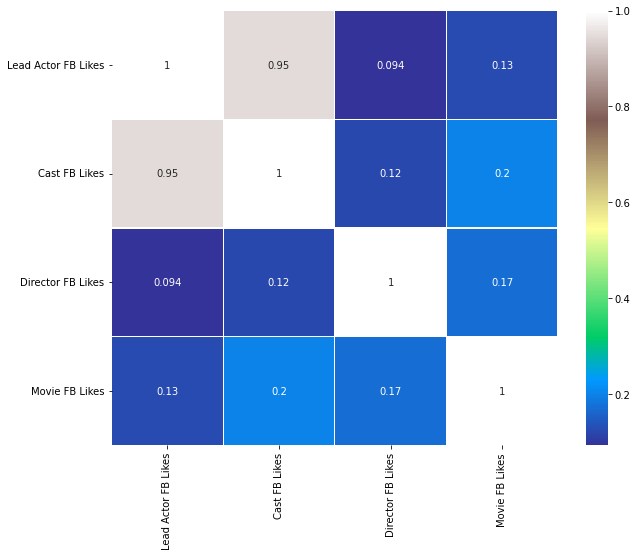

In [26]:
numeric_columns=['Lead Actor FB Likes','Cast FB Likes','Director FB Likes','Movie FB Likes']
sns.heatmap(df2[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

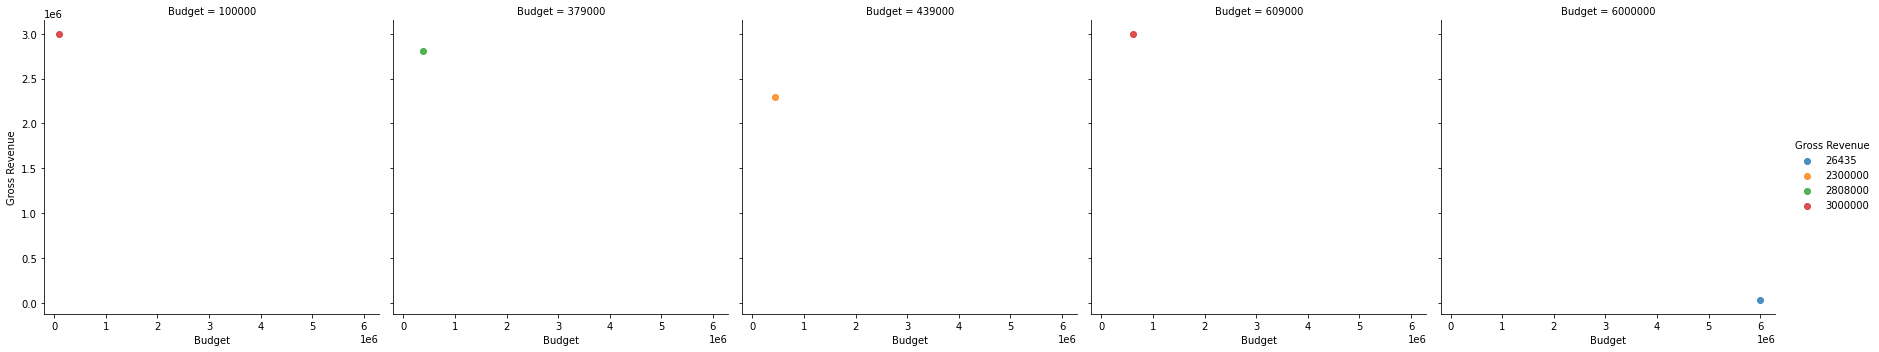

In [33]:
sns.lmplot(x='Budget', y ='Gross Revenue',hue='Gross Revenue', col ='Budget',data=df.head(5))

Text(0.5, 1.0, 'Budget < 200000')

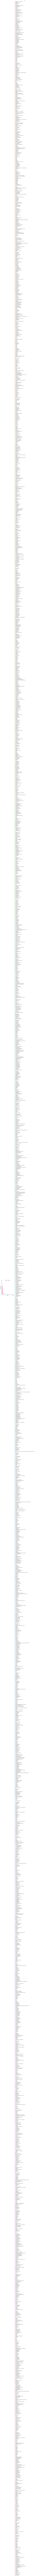

In [35]:

lm = sns.lmplot(x='Budget', y ='Gross Revenue',hue='Title',data=df)
ax1 =lm.axes
ax1=plt.gca()
ax1.set_title('Budget < 200000')

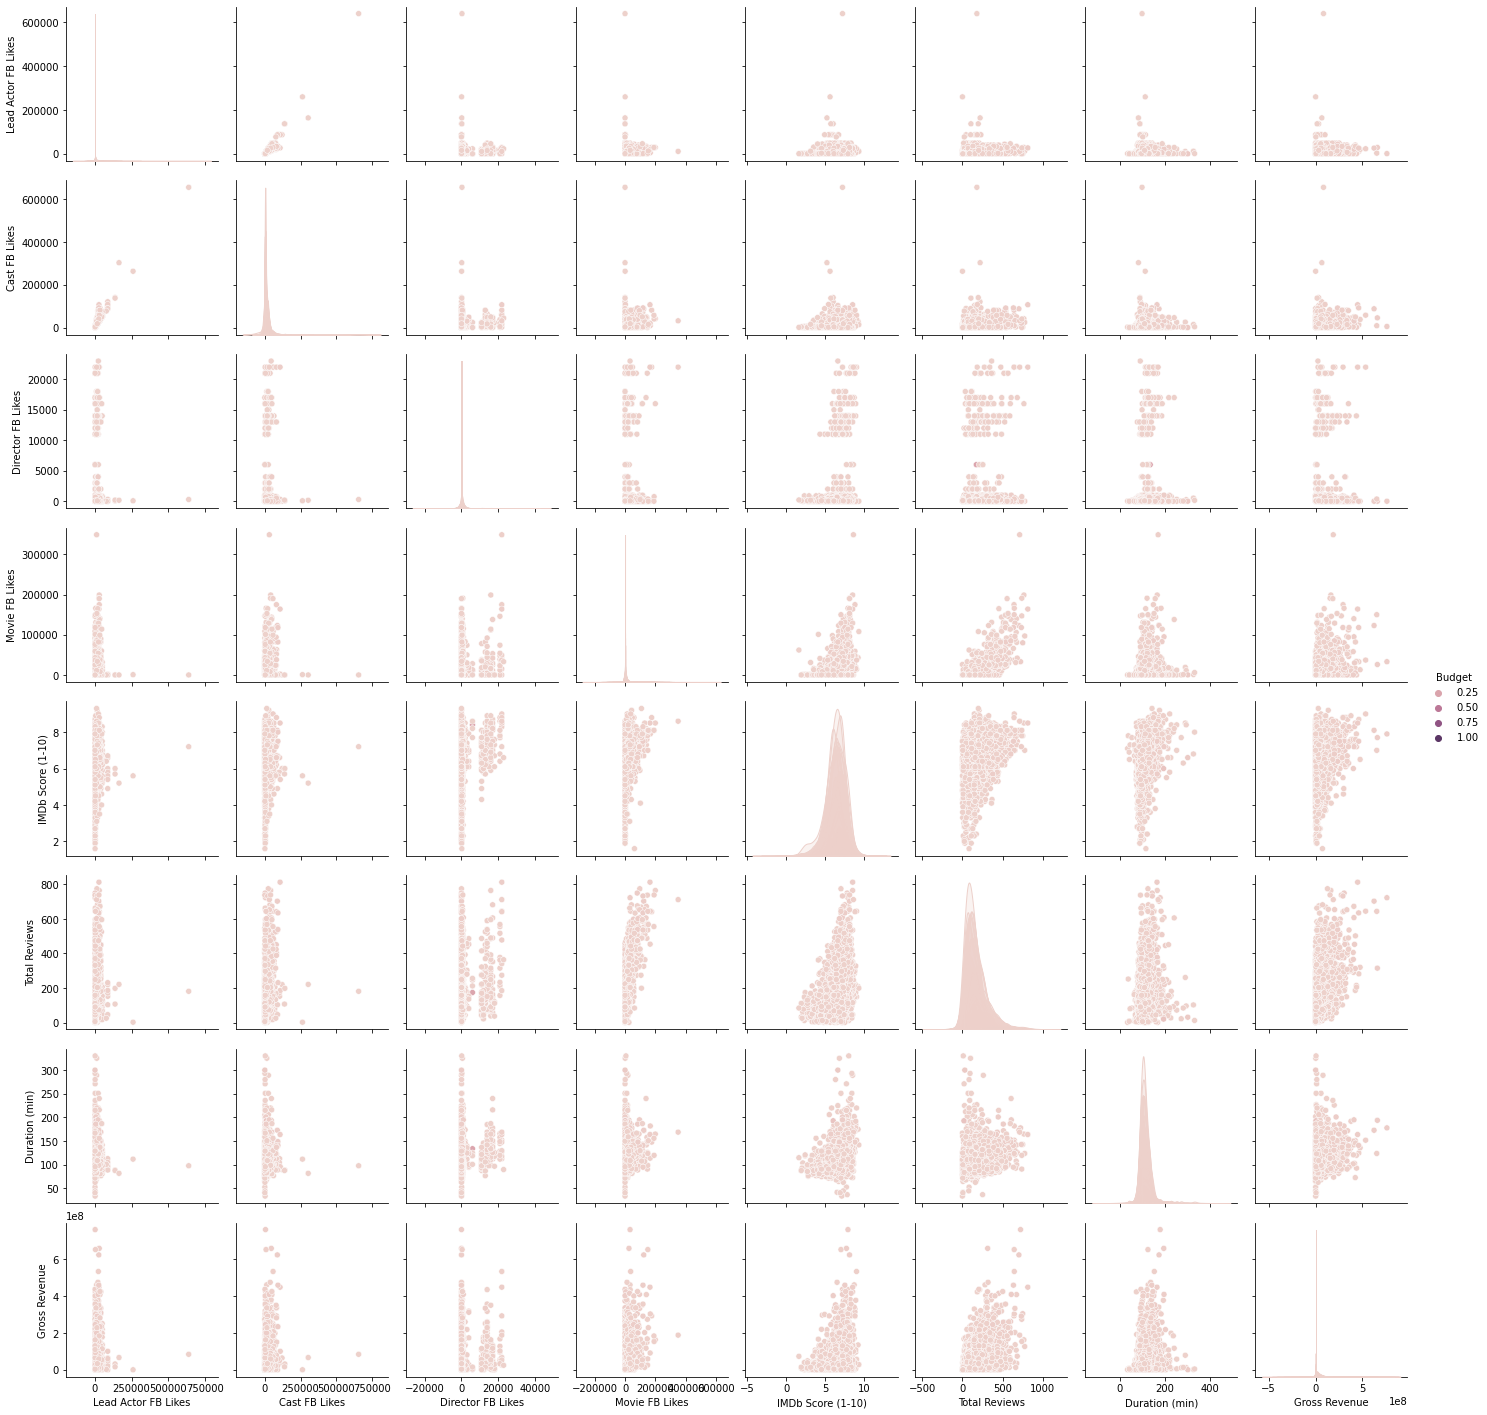

In [38]:
sns.pairplot(df,hue='Budget')